In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Cargar los datos desde un archivo CSV
df = pd.read_csv("timeseries_haul_loading_data.csv", sep=",")
df

,truck,loader,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full,date
0,CAEX56,PH06,299.682208,3.0,2158.0,315.0,4975.0,5191.0,2023-01-01
1,CAEX64,PH48,316.673117,3.0,1737.0,353.0,5152.0,4960.0,2023-01-01
2,CAEX41,PH06,340.529701,3.0,2210.0,388.0,5042.0,4859.0,2023-01-01
3,CAEX41,PH06,292.835476,3.0,2073.0,260.0,5005.0,4869.0,2023-01-01
4,CAEX71,PH06,337.056639,3.0,2346.0,148.0,5614.0,5289.0,2023-01-01
...,...,...,...,...,...,...,...,...,...
395675,CAEX22,PH58,320.327729,3.0,1976.0,320.0,1671.0,4884.0,2024-05-24
395676,CAEX30,PH48,274.369483,4.0,1826.0,275.0,4021.0,5000.0,2024-05-24
395677,CAEX37,PH58,319.958519,3.0,1834.0,268.0,4630.0,4882.0,2024-05-24
395678,CAEX08,PH55,296.690314,3.0,1729.0,318.0,3925.0,3941.0,2024-05-24


In [3]:
#columnas
df.columns

Index(['truck', 'loader', 'ton', 'n_shovel', 'truck_total_cycle',
       'loader_total_cycle', 'distance_empty', 'distance_full', 'date'],
      dtype='object')

In [4]:
# Información de las columnas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395680 entries, 0 to 395679
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   truck               395680 non-null  object 
 1   loader              395680 non-null  object 
 2   ton                 395680 non-null  float64
 3   n_shovel            395680 non-null  float64
 4   truck_total_cycle   395680 non-null  float64
 5   loader_total_cycle  395680 non-null  float64
 6   distance_empty      395680 non-null  float64
 7   distance_full       395680 non-null  float64
 8   date                395680 non-null  object 
dtypes: float64(6), object(3)
memory usage: 27.2+ MB
None


In [5]:
# Resumen estadístico para columnas numéricas
print(df.describe())

                 ton       n_shovel  truck_total_cycle  loader_total_cycle  \
count  395680.000000  395680.000000      395680.000000       395680.000000   
mean      318.007490       3.316556        2284.313481          305.073340   
std        18.124753       0.558689         856.620246          116.657122   
min         0.000000       3.000000          23.000000            0.000000   
25%       305.666647       3.000000        1633.000000          217.000000   
50%       317.758250       3.000000        2134.000000          303.000000   
75%       330.125978       4.000000        2945.000000          390.000000   
max       384.927167      15.000000       15812.000000        11692.000000   

       distance_empty  distance_full  
count   395680.000000  395680.000000  
mean      6161.241612    5782.712235  
std       2569.465489    2355.404982  
min        512.000000     504.000000  
25%       3931.000000    3754.000000  
50%       6009.000000    5412.000000  
75%       8059.000000   

* Variable ton, Se observa que la desviación estandar indica cierta variabilidad en la carga del camión. El minimo indica que hay regristos con tonelaje 0, pudiendo indicar valores faltantes o errores en el registro. Por otro lado los cuartiles, muestra una posible distribución concentrada entorno a la media.
* En el numero de paladas - > La desviación estandar es indica una baja variabilidad de los datos, la mayoría de las cargas requieren un numero de paladas similar. Los minimos y maximos nos estarian indicando una distribución sesgada hacia valores bajos.
* En el ciclo total del camion se observa que existe una alta variabilidad en el tiempo que toma en realizar el ciclo total. Los minimos y maximos reflejan variaciones operativas, posibles tiempos de espera o interrupciones de los ciclos
* El ciclo total de a pala presenta valor minimo 0, al igual que en la variable del tonelaje, indicando que podria no haber sido regristrado correctamente o valor nulo.
* Las variables de distancia vacia y llena, tienen una variabilidad significativa probablemente debido a las rutas de transporte.

In [6]:
#Analisis de cada columna
print("Número de Camiones:", df['truck'].nunique())
print("Número de Palas:", df['loader'].nunique())
print("Valores nulos en 'truck':", df['truck'].isnull().sum())
print("Valores nulos en 'loader':", df['loader'].isnull().sum())

Número de Camiones: 47
Número de Palas: 4
Valores nulos en 'truck': 0
Valores nulos en 'loader': 0


En la base de datos tenemos presente 47 camiones CAEX, 4 palas. No se observan valores nulos en las variables truck y loader.

In [7]:
# Comprobamos que la base de datos no presente valores nulos
df.isnull().sum()

truck                 0
loader                0
ton                   0
n_shovel              0
truck_total_cycle     0
loader_total_cycle    0
distance_empty        0
distance_full         0
date                  0
dtype: int64

Si bien no se observan valores faltantes en la base de datos, las variables ton y loader total cicly presentan valores 0, lo que indica que estos podria indicar que pueden ser errores de registro.

In [8]:
#Del resumen extadístico pudimos observar que en la variable "ton" tenemos valores minimos de 0.0
filtro_ton = df[df["ton"] == 0.0]
filtro_ton

,truck,loader,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full,date
325362,CAEX60,PH55,0.0,3.0,2049.0,52.0,4574.0,4430.0,2024-03-10
325469,CAEX23,PH55,0.0,3.0,1973.0,228.0,4463.0,4384.0,2024-03-10


Observamos que solo existen dos valores donde la variable tonelaje es 0, en los camiones CAEX60 y CAEX23, los camiones muestran haber realizado un recorrido, y se observa que los camiones fueron cargados con la misma pala, la cual se registra que tuvo un numero de paladas y un ciclo total. Cabe destacar que este registro fue tomado el mismo dia. Es importante tomar en cuenta, que esto fue tomado el mismo dia y realizado por la misma pala, por lo que habria que revisar el porque no se refleja ninguna carga en el camion.

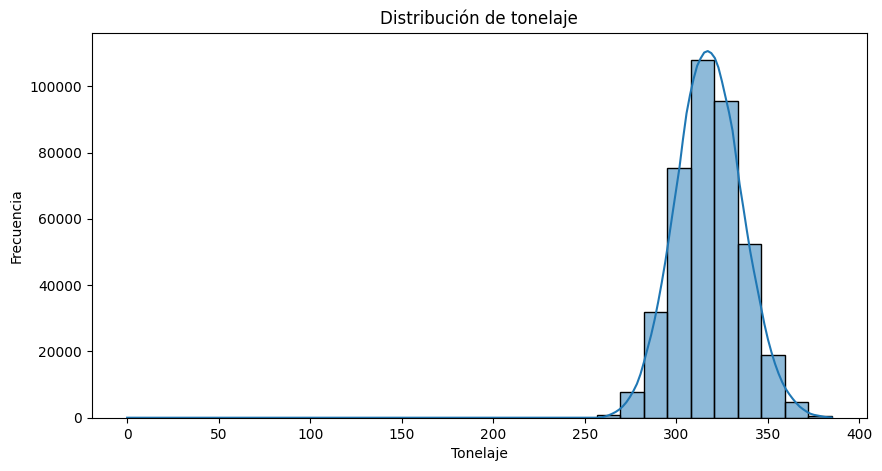

count    395680.000000
mean        318.007490
std          18.124753
min           0.000000
25%         305.666647
50%         317.758250
75%         330.125978
max         384.927167
Name: ton, dtype: float64


In [9]:
# Distribución de tonelaje
plt.figure(figsize=(10, 5))
sns.histplot(df['ton'], bins=30, kde=True)
plt.title('Distribución de tonelaje')
plt.xlabel('Tonelaje')
plt.ylabel('Frecuencia')
plt.show()

# estadísticas básicas
print(df['ton'].describe())

* En el gráfico se puede observar una distribución asimetrica hacia la derecha, esto se debe a la cantidad de registros 0 que se presentan en la data.
* Como se observa en el gráfico, la distribución parece concentrarse el rededor de los valores 300 y 350, lo que se puede observar en la estadistica es la concentracion es entre los 305 y 330 aproximadamente.

In [10]:
# Eliminar registros con ton = 0
dfs = df[df['ton'] != 0]
# Veremos como se comporta la distribucion sin estos dos datos que son 0

In [11]:
# Vemos la estadistica de la variable
print(dfs['ton'].describe())

count    395678.000000
mean        318.009097
std          18.110692
min         260.038945
25%         305.666746
50%         317.758345
75%         330.125999
max         384.927167
Name: ton, dtype: float64


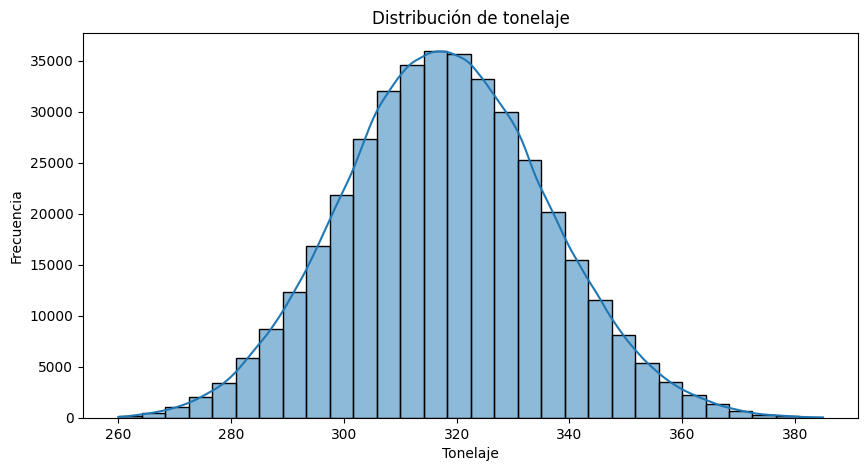

In [12]:
#Rango de tonelaje, valores atípicos y la distribución general de las cargas
plt.figure(figsize=(10, 5))
sns.histplot(dfs['ton'], bins=30, kde=True)
plt.title('Distribución de tonelaje')
plt.xlabel('Tonelaje')
plt.ylabel('Frecuencia')
plt.show()

Despues de eliminar los 0 de la variable ton, podemos observar lo siguiente:
* El gráfico presenta una distribución normal, centrandose alrededor de la media.
* Se observa una menor distribución con menor dispersión.
* Al haber eliminado los valores 0 podemos tener un análisis un poco más preciso.

In [13]:
dfs.describe()

,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full
count,395678.000000,395678.000000,395678.000000,395678.000000,395678.000000,395678.000000
mean,318.009097,3.316558,2284.314862,305.074174,6161.249915,5782.719188
std,18.110692,0.558690,856.622186,116.656659,2569.469326,2355.408904
min,260.038945,3.000000,23.000000,0.000000,512.000000,504.000000
25%,305.666746,3.000000,1633.000000,217.000000,3931.000000,3754.000000
50%,317.758345,3.000000,2134.000000,303.000000,6009.000000,5412.000000
75%,330.125999,4.000000,2945.000000,390.000000,8059.000000,7798.000000
max,384.927167,15.000000,15812.000000,11692.000000,15783.000000,15691.000000


In [14]:
filtro_ciclo_pala = dfs[dfs['loader_total_cycle'] == 0]
filtro_ciclo_pala

,truck,loader,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full,date
120076,CAEX62,PH48,332.223725,3.0,2066.0,0.0,7601.0,7517.0,2023-06-21
122269,CAEX23,PH58,315.621598,3.0,874.0,0.0,8977.0,5806.0,2023-06-25
133219,CAEX44,PH06,319.248812,3.0,1378.0,0.0,5787.0,3404.0,2023-07-11
135557,CAEX94,PH06,325.901023,4.0,923.0,0.0,8929.0,5208.0,2023-07-15
137892,CAEX48,PH06,342.590752,3.0,1022.0,0.0,7767.0,2102.0,2023-07-19
141744,CAEX39,PH48,326.498346,4.0,2182.0,0.0,8651.0,10486.0,2023-07-26
143695,CAEX66,PH58,361.373928,4.0,1457.0,0.0,9023.0,8857.0,2023-07-30
162531,CAEX66,PH58,305.799601,3.0,901.0,0.0,8867.0,6106.0,2023-08-31
167130,CAEX54,PH48,315.663565,3.0,920.0,0.0,4056.0,8436.0,2023-09-08
186884,CAEX08,PH55,332.604468,4.0,874.0,0.0,3790.0,3700.0,2023-10-07


In [15]:
# Revisamos la estadistica
filtro_ciclo_pala.describe()

,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full
count,22.000000,22.000000,22.000000,22.0,22.000000,22.000000
mean,325.120219,3.363636,1302.590909,0.0,6739.954545,6418.272727
std,14.562867,0.581087,732.364511,0.0,2487.988334,2698.273137
min,298.600003,3.000000,39.000000,0.0,3198.000000,2102.000000
25%,316.136743,3.000000,905.750000,0.0,4085.500000,3758.250000
50%,326.199685,3.000000,1146.000000,0.0,7684.000000,6138.500000
75%,332.509282,4.000000,1437.250000,0.0,8813.000000,8714.750000
max,361.373928,5.000000,3159.000000,0.0,10710.000000,10702.000000


* En la tabla y la estadistica se observan 22 valores 0 en el ciclo de la pala.
* Acorde a lo observado, aun no habiendo ciclo total de pala (= 0), los CAEX si tuvieron cargamento y realizaron su ciclo normal.
* Además se observa, que si bien no hubo ciclo de la pala, esta si trabajo con un promedio de 3 paladas en la mayoria de los cargamentos.
* Es importante destacar que todas las cargas fueron realizas con palas distintas, es decir, no se repitio con la misma pala como sucedio con los valores 0 de las toneladas.
* También se destaca que todos los registros fueron realizados dias diferentes y no el mismo dia.

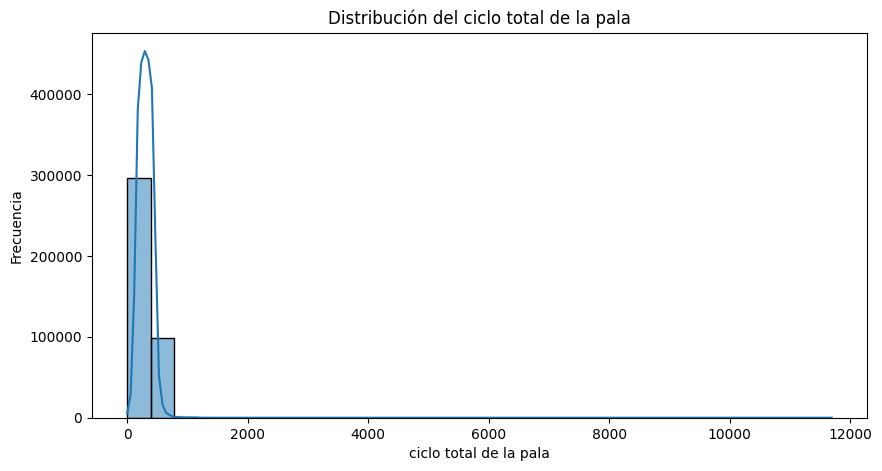

In [ ]:
# Distribución del ciclo de la pala
plt.figure(figsize=(10, 5))
sns.histplot(dfs['loader_total_cycle'], bins=30, kde=True)
plt.title('Distribución del ciclo total de la pala')
plt.xlabel('ciclo total de la pala')
plt.ylabel('Frecuencia')
plt.show()

* En el gráfico podemos ver una gran acumulación de registros en 0 y cercanos a el, lo que sugiere que los valores 0 podrian representar errores o datos faltantes.

In [17]:
# Ahora vamos a ver como se comporta el ciclo total de la pala sin los valores 0
# Primero sacamos los valores 0 de la data
data = dfs[dfs['loader_total_cycle'] != 0]

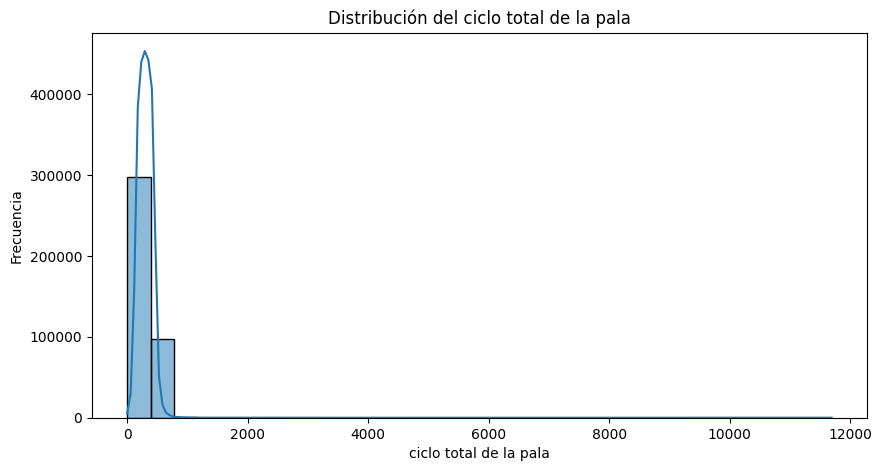

count    395656.000000
mean        305.091137
std         116.637718
min           1.000000
25%         217.000000
50%         303.000000
75%         390.000000
max       11692.000000
Name: loader_total_cycle, dtype: float64

In [18]:
# Distribución del cilo de la pala
plt.figure(figsize=(10, 5))
sns.histplot(data['loader_total_cycle'], bins=30, kde=True)
plt.title('Distribución del ciclo total de la pala')
plt.xlabel('ciclo total de la pala')
plt.ylabel('Frecuencia')
plt.show()
data['loader_total_cycle'].describe()

Podemos ver que no existe diferencia entre el gráfico anterior, y el actual, acorde a lo que se observa es porque tambien existe numeros muy cercanos a 0, como el 1 lo cual igual seria una observacion un poco anormal, ya que el es muy inferior al promedio y a la distribución de los datos. Debido a la cantidad de datos que pueden presentar estos valores, revisaremos mas adelante con gráficos y metodos de detección de anomalias que tan atípicos son.

In [ ]:
# Calculamos el tiempo total de carga por cada camión
dfs['tiempo_total_carga'] = dfs['loader_total_cycle'] * dfs['n_shovel']

# Calculamos el tiempo medio de carga
tiempo_medio_carga = dfs['tiempo_total_carga'].mean()
print("Tiempo medio de carga:", tiempo_medio_carga)

Tiempo medio de carga: 1026.1273661917014


C:\Users\milen\AppData\Local\Temp\ipykernel_18696\920555883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['tiempo_total_carga'] = dfs['loader_total_cycle'] * dfs['n_shovel']


In [ ]:
# Verificamos valores únicos y frecuencia
print("Valores únicos en 'n_shovel':", dfs['n_shovel'].unique())
print("Frecuencia de valores en 'n_shovel':\n", dfs['n_shovel'].value_counts())


Valores únicos en 'n_shovel': [ 3.  4.  5.  6.  7.  8.  9. 10. 13. 15.]
Frecuencia de valores en 'n_shovel':
 n_shovel
3.0     285721
4.0      97607
5.0       9947
6.0       1960
7.0        365
8.0         66
9.0          8
10.0         2
13.0         1
15.0         1
Name: count, dtype: int64


In [21]:
# Estadísticas descriptivas
print("Descripción estadística de 'n_shovel':\n", dfs['n_shovel'].describe())

Descripción estadística de 'n_shovel':
 count    395678.000000
mean          3.316558
std           0.558690
min           3.000000
25%           3.000000
50%           3.000000
75%           4.000000
max          15.000000
Name: n_shovel, dtype: float64


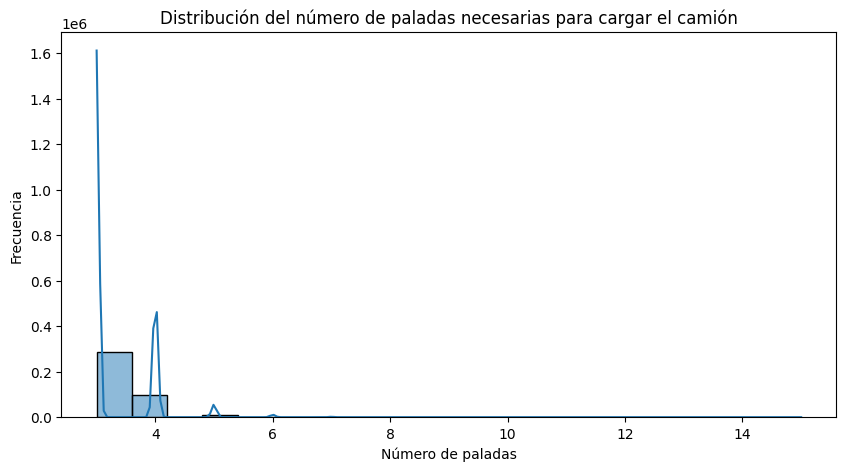

In [22]:
# Distribución de 'n_shovel'
plt.figure(figsize=(10, 5))
sns.histplot(dfs['n_shovel'], bins=20, kde=True)
plt.title('Distribución del número de paladas necesarias para cargar el camión')
plt.xlabel('Número de paladas')
plt.ylabel('Frecuencia')
plt.show()


* La distribución de la variable n_shovel se observa asimetrica hacia la izquierda.
* Se concentra en valores bajos menores a 4, indicando que la mayoria de los caex se cargan con esas cantidad de paladas. Por lo que el tamaño de la pala y la capacidad del caex estarían relacionados. Si observamos la estadística y el gráfico, vemos que la mayoria de los camiones necesitan entre 3 y 4 paladas para ser cargados.
* Se observan valores altos en la estadistica, que llegan al maximo de 15 paladas. Estos valores podrías representas casos atípicos, donde no fue óptimo el proceso de carga de materiales, o ocurre un error en el registro.


In [23]:
# Visualizemos como se comportan los datos filtrando los numero máximos.
filtro_max = dfs[dfs['n_shovel']  > 10]
filtro_max

,truck,loader,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full,date,tiempo_total_carga
122057,CAEX60,PH06,334.025514,13.0,1940.0,115.0,6720.0,3422.0,2023-06-25,1495.0
151567,CAEX84,PH48,335.901772,15.0,2373.0,186.0,10423.0,6355.0,2023-08-11,2790.0


Observamos que existen dos palas que realizaron un numero alto de paladas, si nos fijamos el ciclo total de la pala esta muy por debajo del promedio, para haber realizado tantas paladas para llenar un camion. Los camiones por otro lado se encuentran dentro del promedio de toneladas, por lo que debe existir algun error en el registro de estas palas, debe haber algun suceso o desperfecto técnico o también puede ser un tema de material.

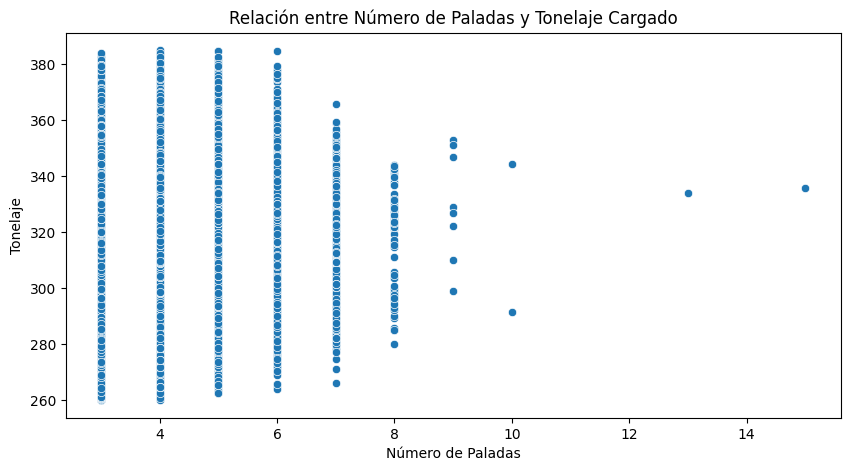

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=dfs, x='n_shovel', y='ton')
plt.title('Relación entre Número de Paladas y Tonelaje Cargado')
plt.xlabel('Número de Paladas')
plt.ylabel('Tonelaje')
plt.show()


* Como se puede observar en el gráfico, entre las 3 y las 6 paladas el tonelaje cargado se concentra en un rango similar, cerano a los 300 a 380 toneladas. Pero al superar las 6 paladas podemos ver que el tonelaje en algunos casos disminuye, pudiendo sugerir una operacion no optima donde se necesito mas paladas para cargar el camion.
* En valores ya superiores a 7, podemos visualizar que los tonelajes ya se encuentran entre 260 y 340 siendo más bajos, sugiriendo posibles problemas con el equipo, otro tipos de materiales o cargas incompletas.

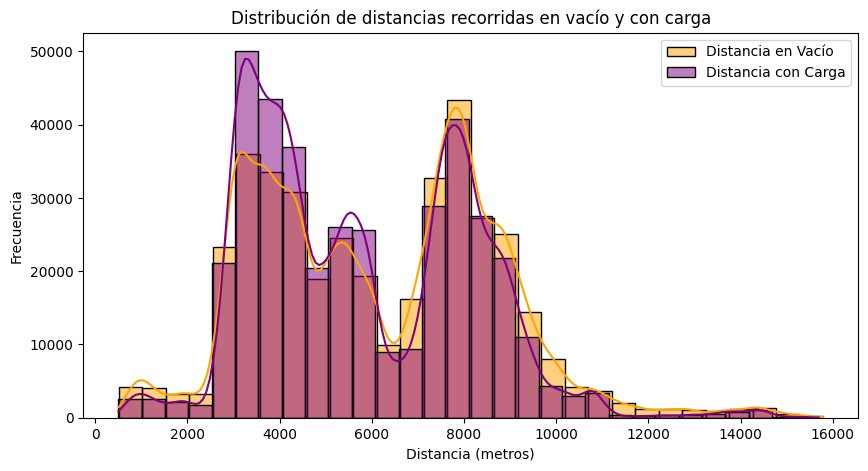

Distancia en vacío: count    395678.000000
mean       6161.249915
std        2569.469326
min         512.000000
25%        3931.000000
50%        6009.000000
75%        8059.000000
max       15783.000000
Name: distance_empty, dtype: float64
Distancia con carga: count    395678.000000
mean       5782.719188
std        2355.408904
min         504.000000
25%        3754.000000
50%        5412.000000
75%        7798.000000
max       15691.000000
Name: distance_full, dtype: float64


In [ ]:
# Visualizamos la distribución de las distancias recorridas en vacío y con carga
plt.figure(figsize=(10, 5))
sns.histplot(dfs['distance_empty'], bins=30, kde=True, color="orange", label="Distancia en Vacío")
sns.histplot(dfs['distance_full'], bins=30, kde=True, color="purple", label="Distancia con Carga")
plt.title('Distribución de distancias recorridas en vacío y con carga')
plt.xlabel('Distancia (metros)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()
print("Distancia en vacío:", dfs['distance_empty'].describe())
print("Distancia con carga:", dfs['distance_full'].describe())


* La distribución de las distancias recorridas en vacio y con carga muestran patrones similares, con picos en los mismo intervalos.
* Se observan dos puntos altos principales en la distancia vacia y con carga, aproximadamente entre los 3000 a 4000 metros y 7000 - 8000 metros. Esto puede indicar rutas comunes.
* Aun que se observa que la distancia vacio y con carga tienen distribuciones similares, existen algunas diferencias en la frecuencia de los valores. La distancia vacia presenta frecuencias más altas que la distancia con carga. Esto podria ser que los camiones puedan tener rutas de retorno un poco diferentes o cambios, esto podria ser concordantes, ya que por lo general en mineria tienden a estar cambiando los lugares de acceso y salida.
* En ambos casos, existen unos pocos valores que alcanzan distancias superiores que alcanzan hasta aproximademente 15000 metros, estas distancias son poco frecuentes, podria sugerir alguna ruta atipica dentro de la operación.
* Se sugiere investigar las rutas y los tiempos de viaje para cada distancia y ver si se encuentran debidamente optimizadas, destancando sobretodo las rutas de retorno.
* Para los valores de distancias superiores a 12000 metros se podria verificar si existen desviaciones, actualizacion de caminos, o condiciones especifica que puedan mejorarse, para disminuir el tiempo de distancia.

In [26]:
# Ahora realizaremos una matriz de correlacion, para eso debemos filtrar las columnas númericas.
# Seleccionar solo las columnas numéricas
numeric_df = dfs.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                         ton  n_shovel  truck_total_cycle  loader_total_cycle  \
ton                 1.000000  0.171360          -0.017246            0.026267   
n_shovel            0.171360  1.000000          -0.026460            0.219889   
truck_total_cycle  -0.017246 -0.026460           1.000000            0.008679   
loader_total_cycle  0.026267  0.219889           0.008679            1.000000   
distance_empty     -0.021919 -0.081965           0.591340           -0.043126   
distance_full      -0.036433 -0.085194           0.739360           -0.060190   
tiempo_total_carga  0.082313  0.589843          -0.001988            0.900734   

                    distance_empty  distance_full  tiempo_total_carga  
ton                      -0.021919      -0.036433            0.082313  
n_shovel                 -0.081965      -0.085194            0.589843  
truck_total_cycle         0.591340       0.739360           -0.001988  
loader_total_cycle       -0.043126      -0.060190            0.

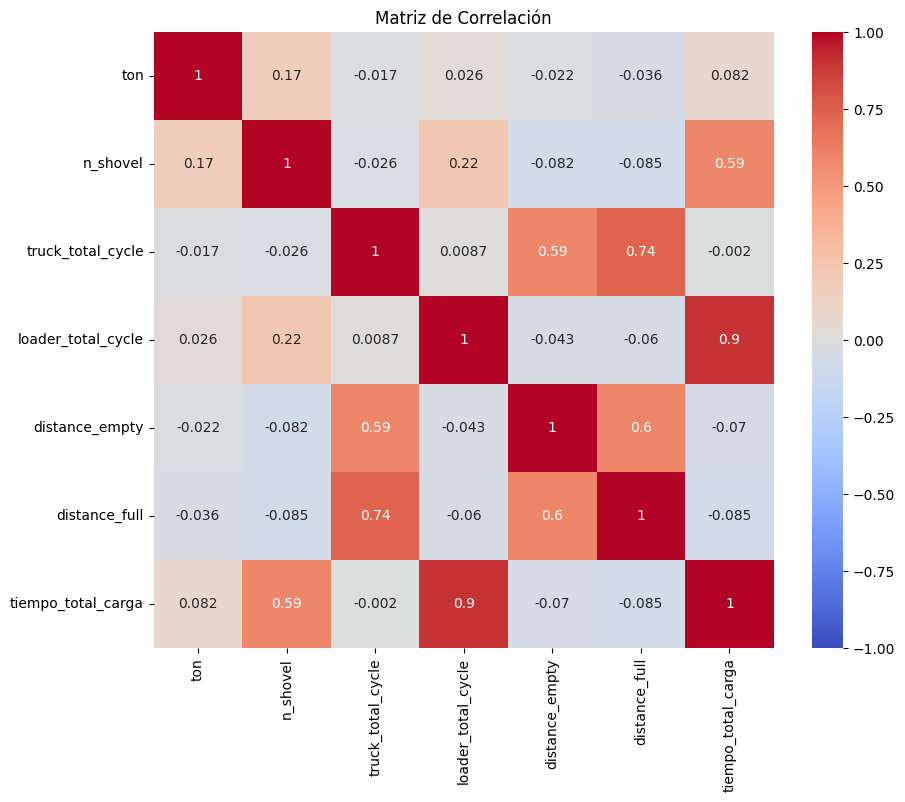

In [ ]:
# Ahora graficamos la matriz de correlación
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()


Con la matriz de correlación podemos visualizar de manera más clara la correlación entre las variables.
*  Se observa una correlación positiva fuerte entre el ciclo total del camión y la distancia recorrida de carga (0.74), ya que un mayor recorrido del camion cargado implica un mayor tiempo de ciclo.
* La correlación positiva entre el ciclo total del camión y la distancia recorrida en vacio tambien destaca, pero en menor medida que la anterior (0.59). Por lo que el ciclo total del camión también aumenta con la distancia recorrida en vacio.
* La correlacion entre la distancia vacia y distancia con carga es positiva y significativa (0.6). Indicando que la rutas que recorren los camiones vacios y las distancias que recorren los camiones cargados tienen una relación consistente, ya que posiblemente recorran rutas similares, lo que suele suceder en algunas operaciones mineras.
* Existe una correlacion baja entre el tonelaje y el numero de paladas (0.17), lo que podria indicar que existe una ligera tendencia en aumentar el número de paladas con el tonelaje, pero con lo que hemos visualizado anteriomente no es tan del todo cierto.
* La baja correlacione que presenta el tonelaje con varias variable sugiere que no esta muy relacionado con el el tiempo total de ciclo (camion y pala), distancia recorrida y el numero de paladas. Por lo que podria indicarnos que el tonelaje puede estar determinado por otros factores fuera de la variables que se encuentran presentes.
* Se sugiere estudiar más a fondo los factores externos que influyen en el tonelaje para maximizar la eficiencia del transporte.


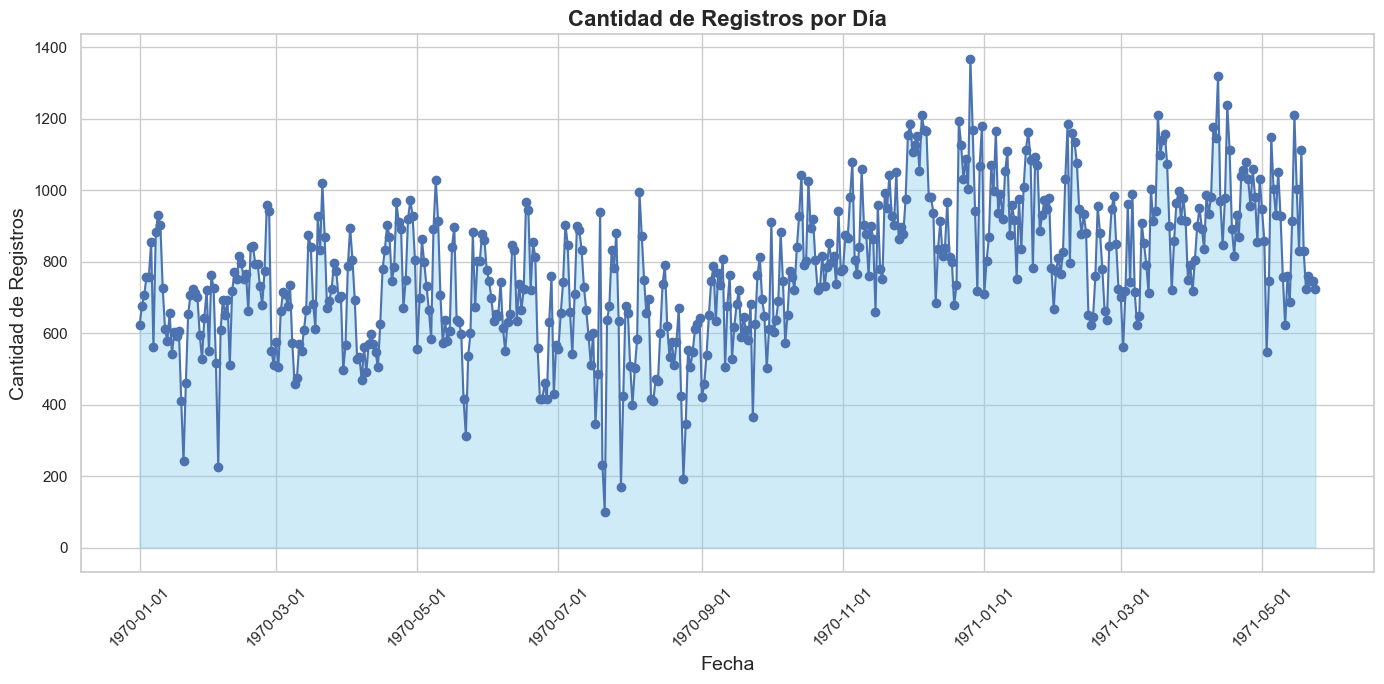

In [ ]:
# Cantidad de registros por dia

registros_por_dia = dfs['date'].value_counts().sort_index()

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
plt.plot(registros_por_dia.index, registros_por_dia.values, color='b', marker='o', linestyle='-')
plt.fill_between(registros_por_dia.index, registros_por_dia.values, color='skyblue', alpha=0.4)

plt.title('Cantidad de Registros por Día', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de Registros', fontsize=14)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

plt.tight_layout()
plt.show()

* Se puede observar que entre el año 2023 al 2024 existe una tendencia en alza de la cantidad de registros por dia, sugiriendo un aumento en la actividad del registro o en la operación. Este aumento también podria estar relacionado a un incremento en la flota de camiones, o una mejora en la captura de datos.
* Existe una variabilidad considerable en el numero de registros diarios. Esto podria deberse a que existen dias con operaciones mas intensas y otros con  una baja en la actividad, como cambios de turnos, problemas climáticos, defectos en algunos equipos.
* Existe la posibilidad de que estas variabilidades donde hay picos maximos y picos bajos, esten relacionados con algun periodo especifico del año.
* Se sugiere analizarr más a fondo los dias con extremos de registros para identificar patrones o factores que puedan afectar a la operacion diaria.

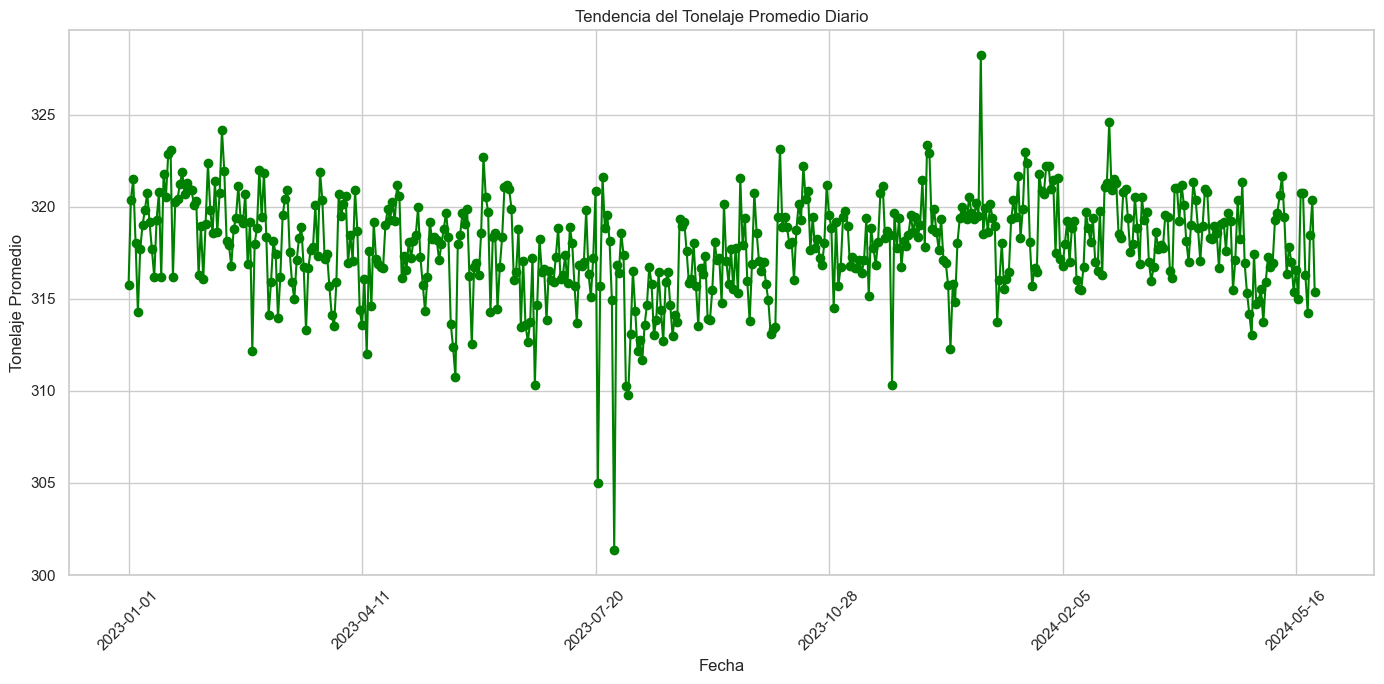

In [29]:
#Tendencia del tonelaje "ton" a lo largo del tiempo
plt.figure(figsize=(14, 7))
dfs.groupby('date')['ton'].mean().plot(kind='line', marker='o', color='green')
plt.title('Tendencia del Tonelaje Promedio Diario')
plt.xlabel('Fecha')
plt.ylabel('Tonelaje Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Podemos visualizar que en general el tonalaje promedio diario se mantiene estable entre las 315 y 320 toneladas.
* Existen picos considerablemente altos donde el tonelaje aumenta. Esto podria ser por uso más eficiente de los recursos.
* Es destacable que existen dias donde hay picos donde el tonelaje cae bajo las 310 toneladas, llegando cercano a las 300. Esto podria deberse a interrupciones, equipos defectuosos, factores climaticos, u otro tipo de situación que detenga la operacion o la relantize.
* Se sugiere analizar a fondo los dias con picos altos y bajos para poder identificar los factores operativos que influyen en los resultados.

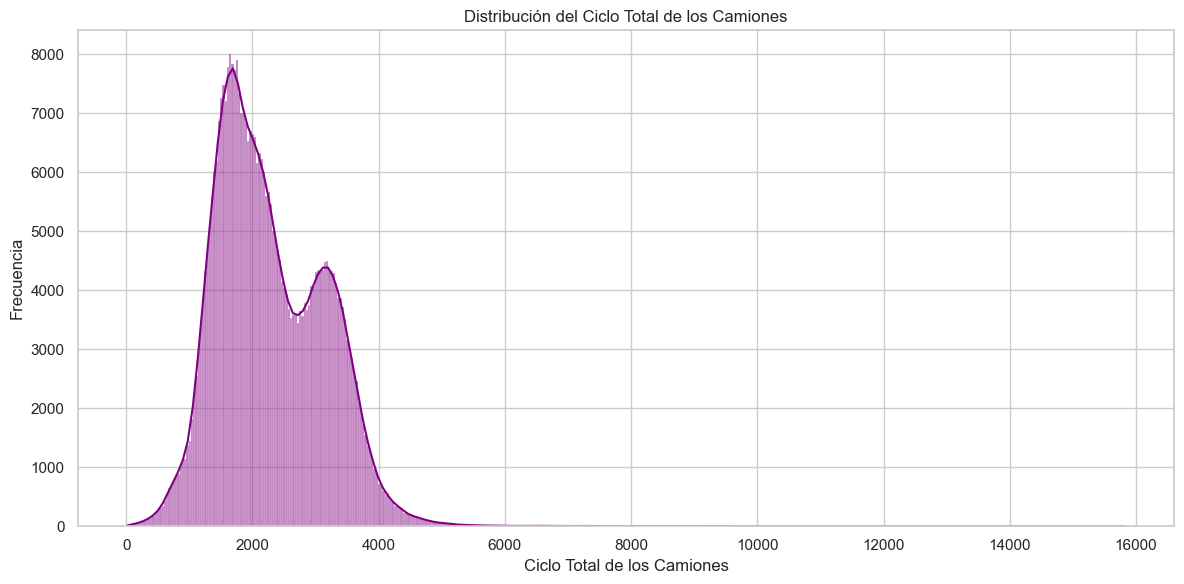

In [30]:
#Distribución del ciclo total del camión
plt.figure(figsize=(12, 6))
sns.histplot(dfs['truck_total_cycle'], kde=True, color='purple')
plt.title('Distribución del Ciclo Total de los Camiones')
plt.xlabel('Ciclo Total de los Camiones')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


* La distribución de los ciclos total de los caex presentan dos picos claros, uno a los 2000 segundos y otro entre los 3000 y 4000 segundos, esto podria indicarnos dos tipos de ciclos operativos distintos, quizas diferentes tipos de rutas, condiciones de carga, o los tipos de camiones utilizados.
* El punto más alto (2000 segundos), representa la mayor frecuencia de tiempo total de ciclo. Esto indicaria que la mayoria de los caex completan su ciclo cercano a este valor, siguiendo un patron predecible y consistente.
* El segundo punto más alto entre los 3000 y  4000 segundos sugiere que algunos caex tienen ciclos total más largos, podria estar relacionado a rutas más largas, tiempos de espera adicionales o alguna otra condicion operativa.
* Superior a los 4000 segundos, la frecuencia disminuye considerablemente  pero existen unos ciclos total de caex que alcanzan valores altos, esto podria deberse a alguna condicion operativa inusual.
* Se sugiere la investigacion de los ciclos totales entre los 3000 y 4000 segundos, y aquellos con valores extremos para identificar las causas.

C:\Users\milen\AppData\Local\Temp\ipykernel_18696\1832890701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loader', y='loader_total_cycle', data=dfs, palette='Set2')


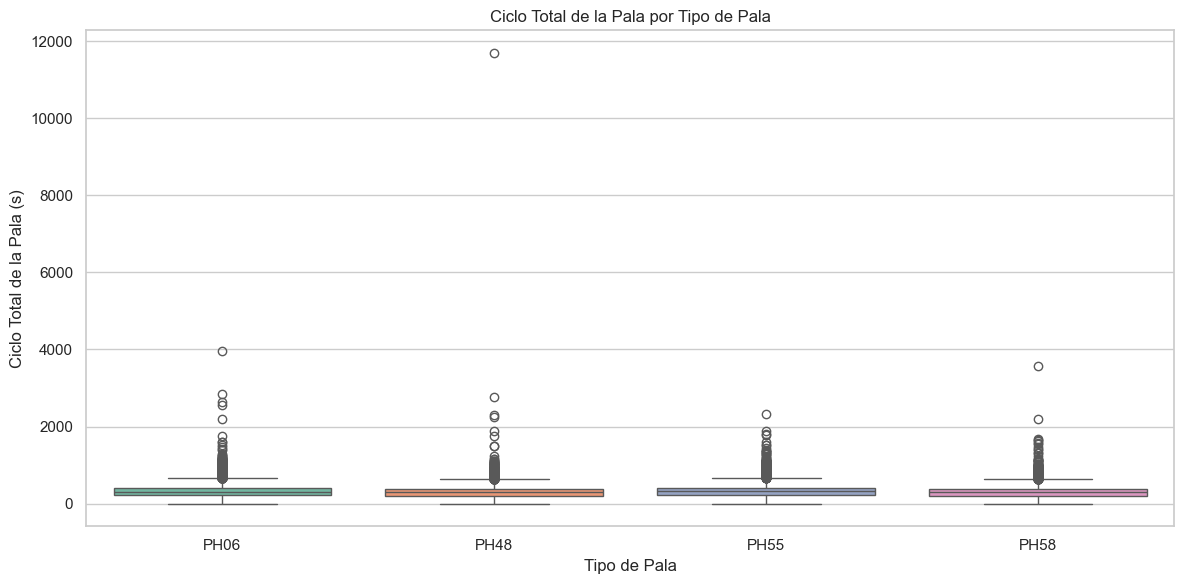

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loader', y='loader_total_cycle', data=dfs, palette='Set2')
plt.title('Ciclo Total de la Pala por Tipo de Pala')
plt.xlabel('Tipo de Pala')
plt.ylabel('Ciclo Total de la Pala (s)')
plt.tight_layout()
plt.show()


* Las cuatro tipos de palas muestran distribuciones similares en el ciclo total de la pala, esto sugiere que el tiempo de ciclo de pala no varía de manera sinificativa, lo cual podria sugerir que los tiempos de operación son consistentes independientemente del tipo de pala.
* Se observa en cada pala valores atípicos que se encuentran sobre el rango principal, pudiendo llegar hasta valores como 12000 segundos. Estos valores nos muestran ciclos total de pala sobre el promedio, esto podria indicarnos algun equipo defectuoso, un tiempo de espera, una interrupcion de la operacion o un registro erroneo de los datos.
* Se sugiere analizar los registros del ciclo total de la pala, que se encuentren en los rangos de estos outliers para identificar las causas.
* Se sugiere considerar posibles estrategias operativas para reducir los ciclos largos, favoreciendo a la efeciciencia en la operacion de carga.

In [32]:
# Visualizamos el valor extremo cercano a los 12000 segundos
PH48 = dfs[dfs['loader_total_cycle'] > 10000]
PH48

,truck,loader,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full,date,tiempo_total_carga
111440,CAEX66,PH48,309.092586,3.0,13500.0,11692.0,7806.0,7874.0,2023-06-10,35076.0


Observamos que la pala el dia 10 de junio del 2023 excede su tiempo de ciclo sobre el promedio y el 75 % de la estadistica de los datos. La pala se encontro casi 3 horas y media parada, o intentando realizar el proceso de carga, Esto podria indicar que la pala haya sufrido un desperfecto mecanico, ya que por lo general en mineria se busca tener el menor tiempo posible de producción.

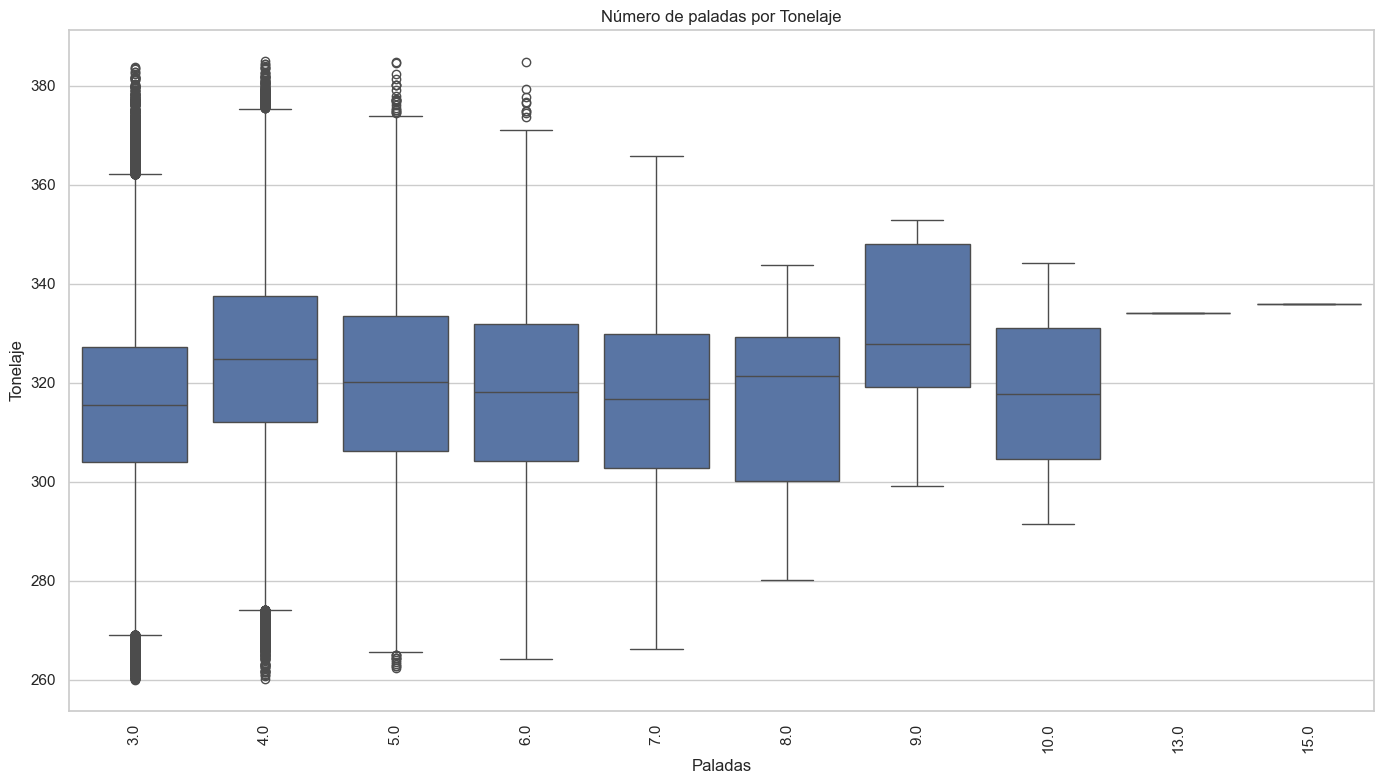

In [33]:
#Número de Paladas (n_shovel) vs. Tonelaje (ton)
plt.figure(figsize=(14 ,8))
sns.boxplot(data=dfs, x='n_shovel', y='ton')
plt.title('Número de paladas por Tonelaje')
plt.xlabel('Paladas')
plt.ylabel('Tonelaje')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* El numero de paladas de entre 3 a 6 parece ser el mpas eficiente, con menor variabilidad en el tonelaje, como se observo anteriomente.
* Los valores más altos de paladas preceb estar asociados con un menor eficiencia con respecto al tonelaje.
* La existencia de los valores atipicos, y la disminución del tonelaje para altos valores de paladas, podrían indicar la necesidad de ajustar el proceso de carga en estos casos.

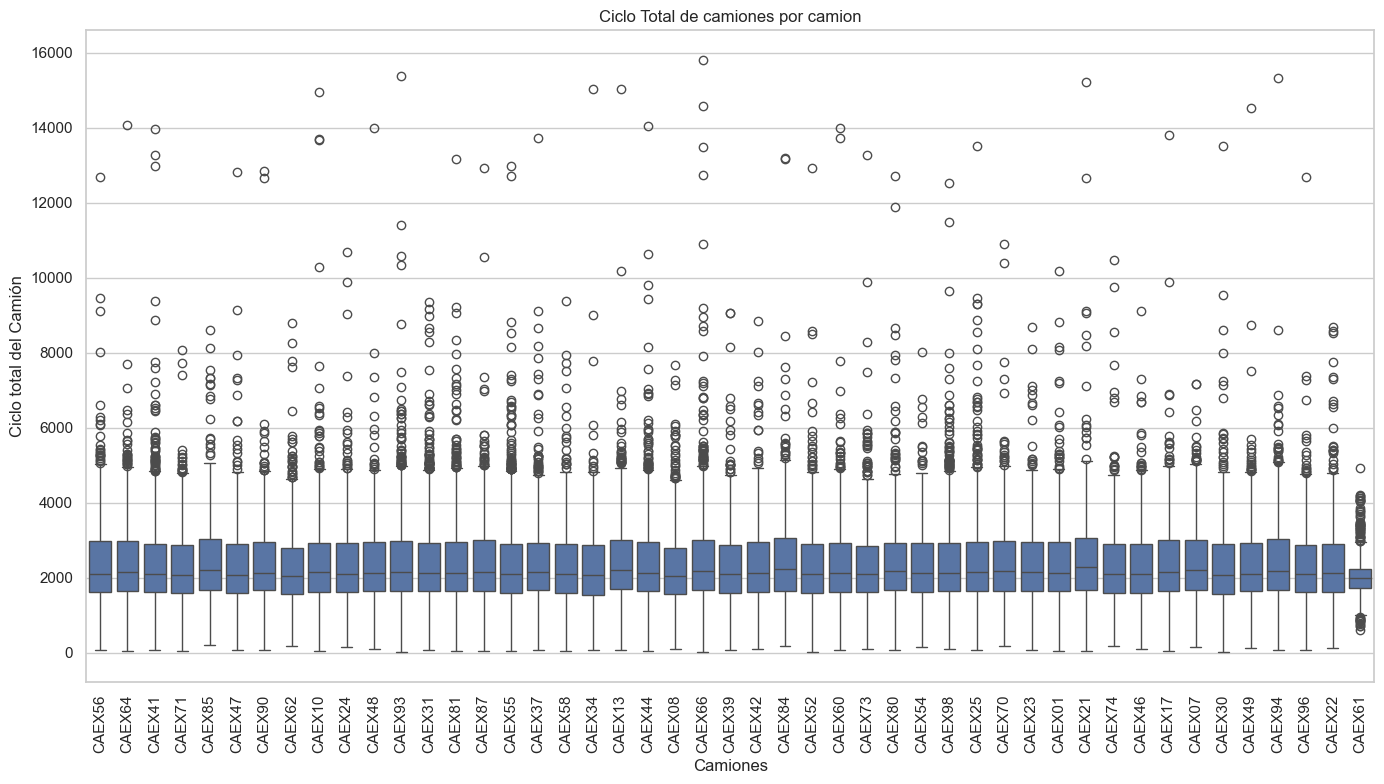

In [34]:
plt.figure(figsize=(14 ,8))
sns.boxplot(data=dfs, x='truck', y='truck_total_cycle')
plt.title('Ciclo Total de camiones por camion')
plt.xlabel('Camiones')
plt.ylabel('Ciclo total del Camión')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Dado que en los boxplots se identifican posibles valores atípicos, aplicaremos dos técnicas de detección de anomalías: Isolation Forest y DBSCAN. La razón de emplear ambos métodos es que, sin contar con la interpretación de un experto en minería ni información adicional sobre los datos, queremos aumentar la precisión en la identificación de verdaderas anomalías. Al combinar los resultados de ambos modelos, podemos tener mayor confianza en los valores detectados, ya que una coincidencia entre los dos indica con mayor probabilidad la presencia de una anomalía real en el contexto operativo.

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_df_scale = scaler.fit_transform(numeric_df)

In [36]:
from sklearn.ensemble import IsolationForest

modelo_if = IsolationForest(
    n_estimators = 100,
    max_samples = 'auto',
    contamination = 0.05,
    random_state = 42
)

modelo_if.fit(X=numeric_df_scale)


IsolationForest(contamination=0.05, random_state=42)

In [37]:
outliers = modelo_if.predict(numeric_df_scale)
dfs['Anomalia_if'] = outliers

C:\Users\milen\AppData\Local\Temp\ipykernel_18696\324300168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Anomalia_if'] = outliers


In [38]:
outliers_count = dfs['Anomalia_if'].value_counts()
print("Conteo de outliers")
print(outliers_count)

Conteo de outliers
Anomalia_if
 1    375894
-1     19784
Name: count, dtype: int64


In [39]:
outliers_data = dfs[dfs['Anomalia_if'] == -1]
outliers_data

,truck,loader,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full,date,tiempo_total_carga,Anomalia_if
11,CAEX10,PH06,296.667077,4.0,2276.0,670.0,6065.0,6170.0,2023-01-01,2680.0,-1
53,CAEX39,PH48,330.087346,5.0,2253.0,502.0,5268.0,5148.0,2023-01-01,2510.0,-1
136,CAEX98,PH55,306.464515,5.0,2562.0,408.0,8450.0,7761.0,2023-01-01,2040.0,-1
138,CAEX74,PH55,297.236239,5.0,3007.0,604.0,9097.0,7855.0,2023-01-01,3020.0,-1
260,CAEX56,PH06,311.626344,4.0,2508.0,596.0,4839.0,6122.0,2023-01-01,2384.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
395454,CAEX54,PH06,340.203232,4.0,2084.0,483.0,783.0,8191.0,2024-05-24,1932.0,-1
395548,CAEX66,PH55,291.153136,3.0,3694.0,462.0,13757.0,3954.0,2024-05-24,1386.0,-1
395591,CAEX96,PH48,337.394064,4.0,1919.0,695.0,4317.0,5138.0,2024-05-24,2780.0,-1
395609,CAEX44,PH55,344.277059,5.0,1996.0,424.0,4200.0,4117.0,2024-05-24,2120.0,-1


In [40]:
# aplicamos ahora DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dfs['anomalia_db'] = dbscan.fit_predict(numeric_df_scale)

# Identificamos los outliers
outliers_dbscan = dfs[dfs['anomalia_db'] == -1]

print("Datos con anomalías detectadas por DBSCAN:")
print(outliers_dbscan)

Datos con anomalías detectadas por DBSCAN:
         truck loader         ton  n_shovel  truck_total_cycle  \
11      CAEX10   PH06  296.667077       4.0             2276.0   
24      CAEX81   PH48  307.828687       4.0             3187.0   
30      CAEX34   PH48  315.396627       3.0             1330.0   
63      CAEX60   PH48  299.546390       3.0             2180.0   
138     CAEX74   PH55  297.236239       5.0             3007.0   
...        ...    ...         ...       ...                ...   
395454  CAEX54   PH06  340.203232       4.0             2084.0   
395548  CAEX66   PH55  291.153136       3.0             3694.0   
395568  CAEX98   PH48  315.534496       4.0             4206.0   
395589  CAEX07   PH58  331.179126       4.0             1206.0   
395591  CAEX96   PH48  337.394064       4.0             1919.0   

        loader_total_cycle  distance_empty  distance_full        date  \
11                   670.0          6065.0         6170.0  2023-01-01   
24                

C:\Users\milen\AppData\Local\Temp\ipykernel_18696\1770247081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['anomalia_db'] = dbscan.fit_predict(numeric_df_scale)


In [42]:
data_anomalia = dfs[(dfs['Anomalia_if'] == -1) | (dfs['anomalia_db'])]
data_anomalia

,truck,loader,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full,date,tiempo_total_carga,Anomalia_if,anomalia_db
8,CAEX47,PH06,314.293201,4.0,2358.0,276.0,4932.0,4864.0,2023-01-01,1104.0,1,1
11,CAEX10,PH06,296.667077,4.0,2276.0,670.0,6065.0,6170.0,2023-01-01,2680.0,-1,-1
16,CAEX48,PH06,332.335459,4.0,1920.0,287.0,5184.0,5069.0,2023-01-01,1148.0,1,1
24,CAEX81,PH48,307.828687,4.0,3187.0,181.0,9470.0,5065.0,2023-01-01,724.0,1,-1
25,CAEX87,PH48,288.190085,4.0,1975.0,317.0,5010.0,5212.0,2023-01-01,1268.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395663,CAEX52,PH55,367.074348,4.0,1778.0,212.0,4089.0,4020.0,2024-05-24,848.0,1,1
395666,CAEX31,PH55,309.663158,4.0,1835.0,199.0,4059.0,3982.0,2024-05-24,796.0,1,1
395668,CAEX44,PH55,335.861273,4.0,2187.0,199.0,3930.0,4010.0,2024-05-24,796.0,1,1
395669,CAEX48,PH55,324.809192,4.0,1799.0,281.0,3967.0,4024.0,2024-05-24,1124.0,1,1


Se detectan 14673 datos anomalos en conjunto con el isolation forest y dbscan, si bien no eliminaremos estos datos debido a que nos falta información extra para observar si son realmente atípicos o son excepeciones, podemos visualizar el comportamiento de los datos con y sin los datos atípicos.

In [43]:
dfs['loader_total_cycle'].describe()

count    395678.000000
mean        305.074174
std         116.656659
min           0.000000
25%         217.000000
50%         303.000000
75%         390.000000
max       11692.000000
Name: loader_total_cycle, dtype: float64

In [44]:
# Verificamos como se identificaron los 0 en el ciclo total de la pala
pala = dfs[dfs['loader_total_cycle'] == 0]
pala

,truck,loader,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full,date,tiempo_total_carga,Anomalia_if,anomalia_db
120076,CAEX62,PH48,332.223725,3.0,2066.0,0.0,7601.0,7517.0,2023-06-21,0.0,-1,0
122269,CAEX23,PH58,315.621598,3.0,874.0,0.0,8977.0,5806.0,2023-06-25,0.0,-1,-1
133219,CAEX44,PH06,319.248812,3.0,1378.0,0.0,5787.0,3404.0,2023-07-11,0.0,-1,0
135557,CAEX94,PH06,325.901023,4.0,923.0,0.0,8929.0,5208.0,2023-07-15,0.0,-1,-1
137892,CAEX48,PH06,342.590752,3.0,1022.0,0.0,7767.0,2102.0,2023-07-19,0.0,-1,-1
141744,CAEX39,PH48,326.498346,4.0,2182.0,0.0,8651.0,10486.0,2023-07-26,0.0,-1,-1
143695,CAEX66,PH58,361.373928,4.0,1457.0,0.0,9023.0,8857.0,2023-07-30,0.0,-1,-1
162531,CAEX66,PH58,305.799601,3.0,901.0,0.0,8867.0,6106.0,2023-08-31,0.0,-1,-1
167130,CAEX54,PH48,315.663565,3.0,920.0,0.0,4056.0,8436.0,2023-09-08,0.0,-1,-1
186884,CAEX08,PH55,332.604468,4.0,874.0,0.0,3790.0,3700.0,2023-10-07,0.0,-1,1


* Podemos observar que los valores 0 fueron detectados en su totalidad como datos anomalos por el isolation forest. Ahora bien, en vez de eliminarlos realizaremos una data nueva sin los datos para observar como fluctua el modelo con los datos y sin los datos.

In [45]:
# Realizamos la data si los valores 0
data = dfs[dfs['loader_total_cycle'] != 0]

# Ranking de desempeño de los equipos

In [88]:
#Eficiencia de carga por ciclo (toneladas por segundos operativos)
dfs['eficiencia_carga'] = dfs['ton'] / dfs['truck_total_cycle']

#Calculamos la efeciciencia de carga por el ciclo total del camion con la base de datos si nos los valores 0 de la variable loader_total_cycle para ocupar más adelante
data['eficiencia_carga'] = data['ton'] / data['truck_total_cycle']

In [47]:

#Utilización de la capacidad de carga
capacidad_maxima = 384.927167 # Se asume el tonelaje maximo a partir de la valor máximo de esta variable.
dfs['utilizacion_capacidad'] = (dfs['ton'] / capacidad_maxima) * 100

C:\Users\milen\AppData\Local\Temp\ipykernel_18696\570371262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['utilizacion_capacidad'] = (dfs['ton'] / capacidad_maxima) * 100


In [48]:
# Calculamos la productividad en distancia recorrida
dfs['productividad_transporte'] = dfs['ton'] / (dfs['distance_empty'] + dfs['distance_full'])


C:\Users\milen\AppData\Local\Temp\ipykernel_18696\3775188738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['productividad_transporte'] = dfs['ton'] / (dfs['distance_empty'] + dfs['distance_full'])


In [49]:
#Calcular la Eficiencia de Carga del Equipo de Carga (Pala)
dfs['eficiencia_carga_pala'] = dfs['ton'] / dfs['n_shovel']


C:\Users\milen\AppData\Local\Temp\ipykernel_18696\2583825117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['eficiencia_carga_pala'] = dfs['ton'] / dfs['n_shovel']


In [50]:
#Calcular el tiempo de ciclo total
dfs['tiempo_ciclo_total'] = dfs['truck_total_cycle'] + dfs['loader_total_cycle']


C:\Users\milen\AppData\Local\Temp\ipykernel_18696\3678907472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['tiempo_ciclo_total'] = dfs['truck_total_cycle'] + dfs['loader_total_cycle']


In [ ]:
# Normalizamos las métricas para que todas tengan valores comparables.
dfs['eficiencia_carga_norm'] = dfs['eficiencia_carga'] / dfs['eficiencia_carga'].max()
dfs['utilizacion_capacidad_norm'] = dfs['utilizacion_capacidad'] / dfs['utilizacion_capacidad'].max()
dfs['productividad_transporte_norm'] = dfs['productividad_transporte'] / dfs['productividad_transporte'].max()
dfs['eficiencia_carga_pala_norm'] = dfs['eficiencia_carga_pala'] / dfs['eficiencia_carga_pala'].max()

# Calculamos el puntaje total sumando las métricas normalizadas.
dfs['puntaje_total'] = (dfs['eficiencia_carga_norm'] +
                       dfs['utilizacion_capacidad_norm'] +
                       dfs['productividad_transporte_norm'] +
                       dfs['eficiencia_carga_pala_norm'])

dfs = dfs.sort_values(by='puntaje_total', ascending=False)


C:\Users\milen\AppData\Local\Temp\ipykernel_18696\2683478769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['eficiencia_carga_norm'] = dfs['eficiencia_carga'] / dfs['eficiencia_carga'].max()
C:\Users\milen\AppData\Local\Temp\ipykernel_18696\2683478769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['utilizacion_capacidad_norm'] = dfs['utilizacion_capacidad'] / dfs['utilizacion_capacidad'].max()
C:\Users\milen\AppData\Local\Temp\ipykernel_18696\2683478769.py:4: SettingWithCopyWarning: 
A val

In [ ]:
# Mostramos el ranking
dfs['rank'] = dfs['puntaje_total'].rank(ascending=False)
print(dfs[['truck', 'rank']])


         truck      rank
57335   CAEX48       1.0
57851   CAEX98       2.0
141659  CAEX52       3.0
302928  CAEX44       4.0
250505  CAEX60       5.0
...        ...       ...
41929   CAEX93  395674.0
70094   CAEX84  395675.0
171965  CAEX98  395676.0
66859   CAEX34  395677.0
50551   CAEX42  395678.0

[395678 rows x 2 columns]


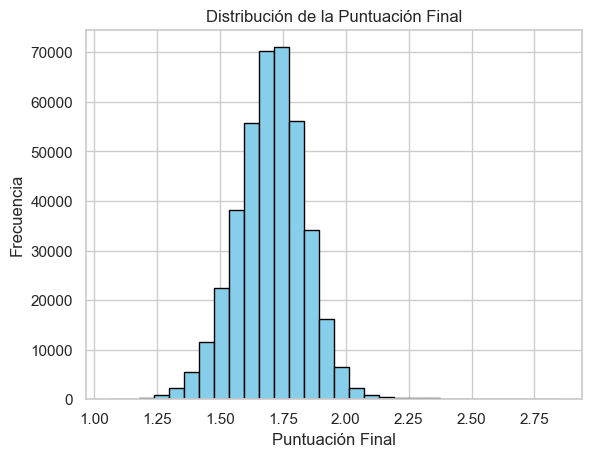

In [54]:
plt.hist(dfs['puntaje_total'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Puntuación Final')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Puntuación Final')
plt.show()

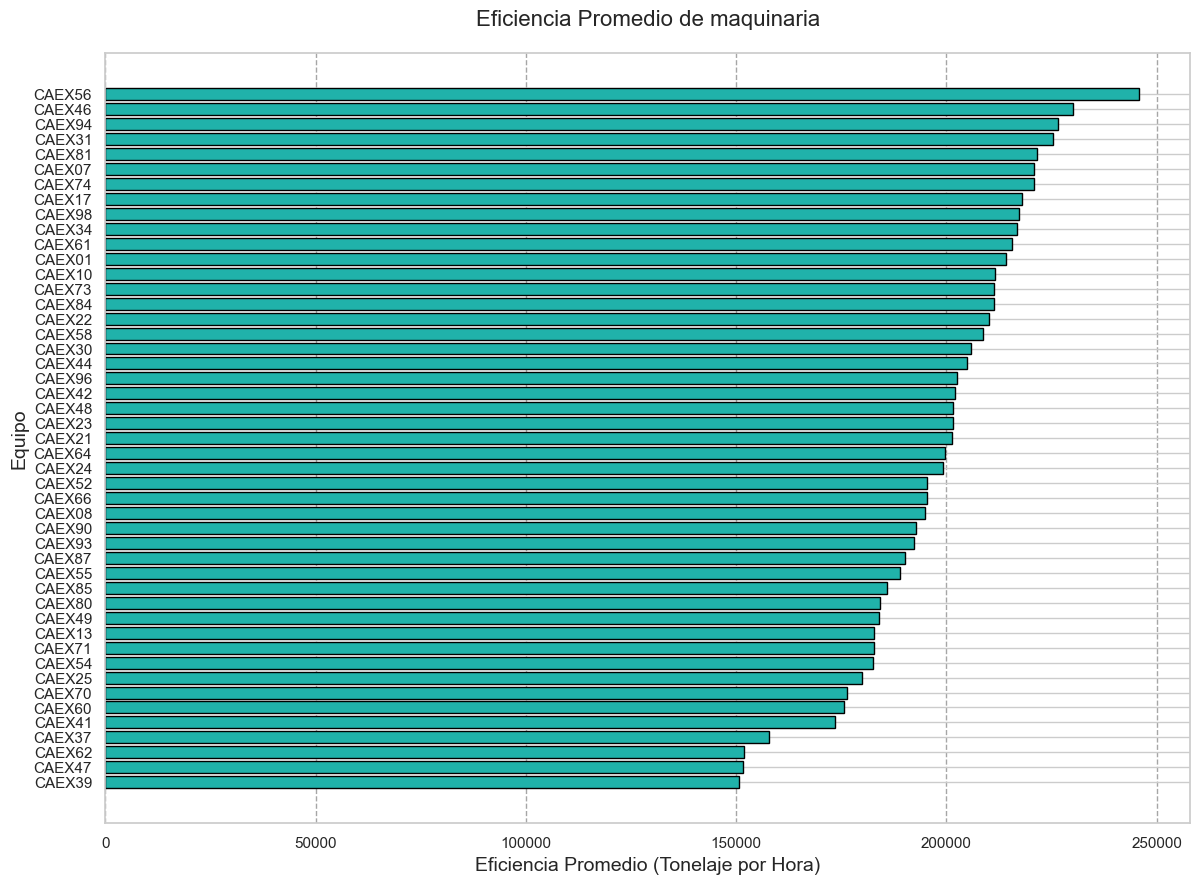

In [ ]:
# Realizamos el gráfico de eficiencia promedio de maquinaria
df_avg_eficiencia = dfs.groupby('truck')['rank'].mean().reset_index()
df_avg_eficiencia['rank'] = df_avg_eficiencia['rank']
df_avg_eficiencia = df_avg_eficiencia.sort_values(by='rank', ascending=False)
plt.figure(figsize=(14, 10))
plt.barh(df_avg_eficiencia['truck'], df_avg_eficiencia['rank'], color='lightseagreen', edgecolor='black')
plt.xlabel('Eficiencia Promedio (Tonelaje por Hora)', fontsize=14)
plt.ylabel('Equipo', fontsize=14)
plt.title('Eficiencia Promedio de maquinaria', fontsize=16, pad=20)
plt.gca().invert_yaxis()  # Invertimos el eje Y para que el equipo con mayor promedio esté en la parte superior

plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)


plt.show()


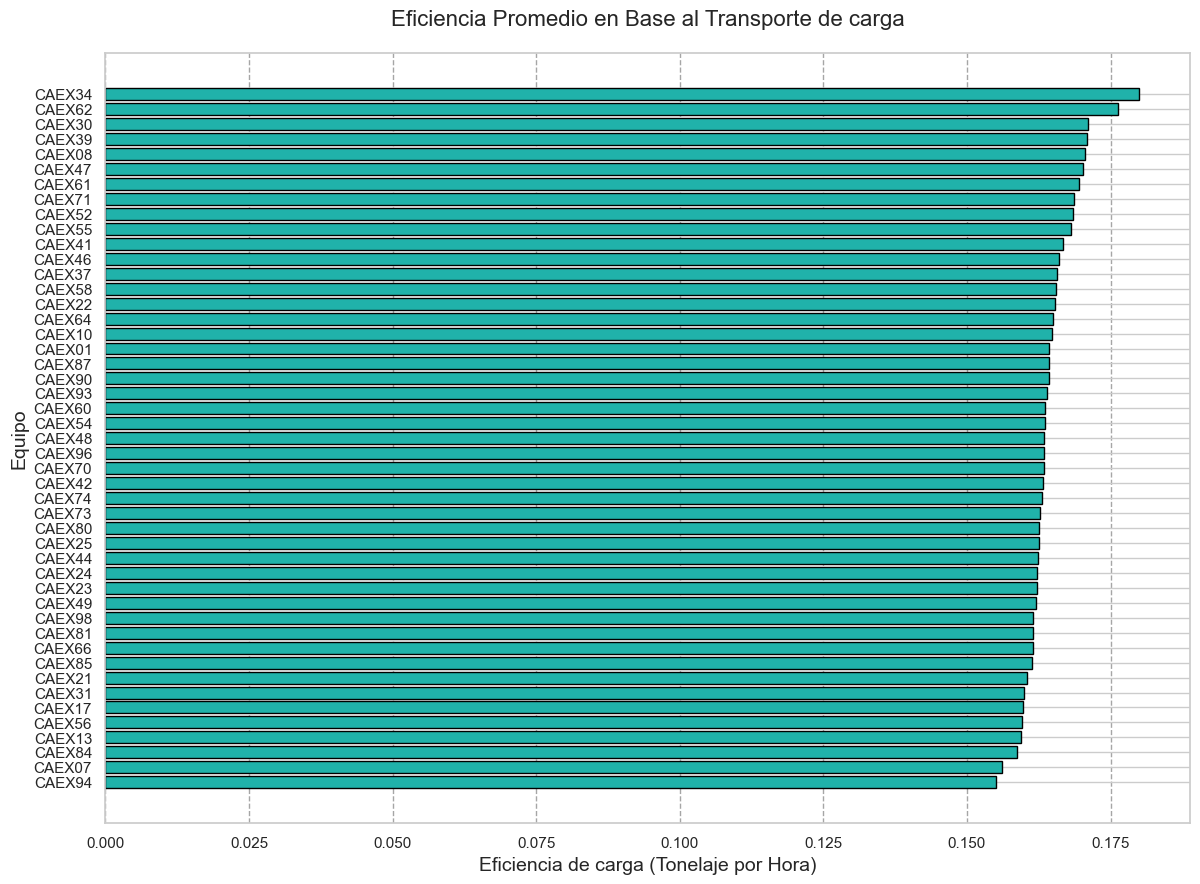

In [ ]:
# Realizamos el gráfico de eficiencia promedio en base al transporte de la carga
df_avg_eficiencia = dfs.groupby('truck')['eficiencia_carga'].mean().reset_index()
df_avg_eficiencia['eficiencia_carga'] = df_avg_eficiencia['eficiencia_carga']
df_avg_eficiencia = df_avg_eficiencia.sort_values(by='eficiencia_carga', ascending=False)
plt.figure(figsize=(14, 10))
plt.barh(df_avg_eficiencia['truck'], df_avg_eficiencia['eficiencia_carga'], color='lightseagreen', edgecolor='black')
plt.xlabel('Eficiencia de carga (Tonelaje por Hora)', fontsize=14)
plt.ylabel('Equipo', fontsize=14)
plt.title('Eficiencia Promedio en Base al Transporte de carga', fontsize=16, pad=20)
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)

plt.show()

# Factores Críticos.

Para la identificación de los factores críticos utilizaremos el modelo random forest, esto es debido  a que este modelo puede manejar un gran número de columnas, es flexible, proporciona una alta precisión, maneja bien las características de los datos, es robusto contra el sobreajuste y nos da la posibilidad de interpretar la importancia de las caracteristicas

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Ocuparemos Random Forest
# Definimos las variables predictoras y la variable objetivo
X = dfs[['truck', 'loader', 'ton', 'n_shovel', 'truck_total_cycle','loader_total_cycle', 'distance_empty', 'distance_full']]
y = dfs['eficiencia_carga'] #Toneladas por segundo
# Acá la variable target es la eficiencia de cara, el rendimiento por tonelaje transportado por ciclo de tyiemplo completo del caex

In [60]:
# preprocesamiento de variables categoricas

categoricas = ['truck', 'loader']
codificadas = OneHotEncoder(drop='first', sparse_output=False)
X_codificadas = codificadas.fit_transform(X[categoricas])

In [61]:
X_numericas = X.drop(columns=categoricas).values
X_preprocesadas = np.concatenate([X_codificadas, X_numericas], axis =1)

In [62]:
# Relizamos el conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_preprocesadas, y, test_size=0.3, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
hiperparametros = {
    "criterion": ["squared_error"],
    "n_estimators": [50],
    "max_depth": [None],
    "max_features": ['sqrt'],
}

busqueda = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=hiperparametros,
    scoring="neg_mean_squared_error",
    cv=3,
    n_jobs=-1,
    verbose=1
)

busqueda.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [None],
                         'max_features': ['sqrt'], 'n_estimators': [50]},
             scoring='neg_mean_squared_error', verbose=1)

In [65]:
mejor_rf = busqueda.best_estimator_
mejor_rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=50, n_jobs=-1,
                      random_state=42)

In [66]:
y_pred = mejor_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [67]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error (MSE): 0.0018355257246950626
R2 Score: 0.8569366121216826


* Analizamos el MSE, el valor del error promedio es bajo sugiriendo que las predicciones son cercanas a los valores reales.
* el R^2, presenta un valor alto, por lo que el modelo es capaz de explicar un 85.7% de la varianza de los datos.

In [ ]:
feature_importances = mejor_rf.feature_importances_
feature_names = codificadas.get_feature_names_out(categoricas).tolist() + ['n_shovel', 'truck_total_cycle', 'loader_total_cycle', 'distance_empty', 'distance_full', 'ton']


In [69]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

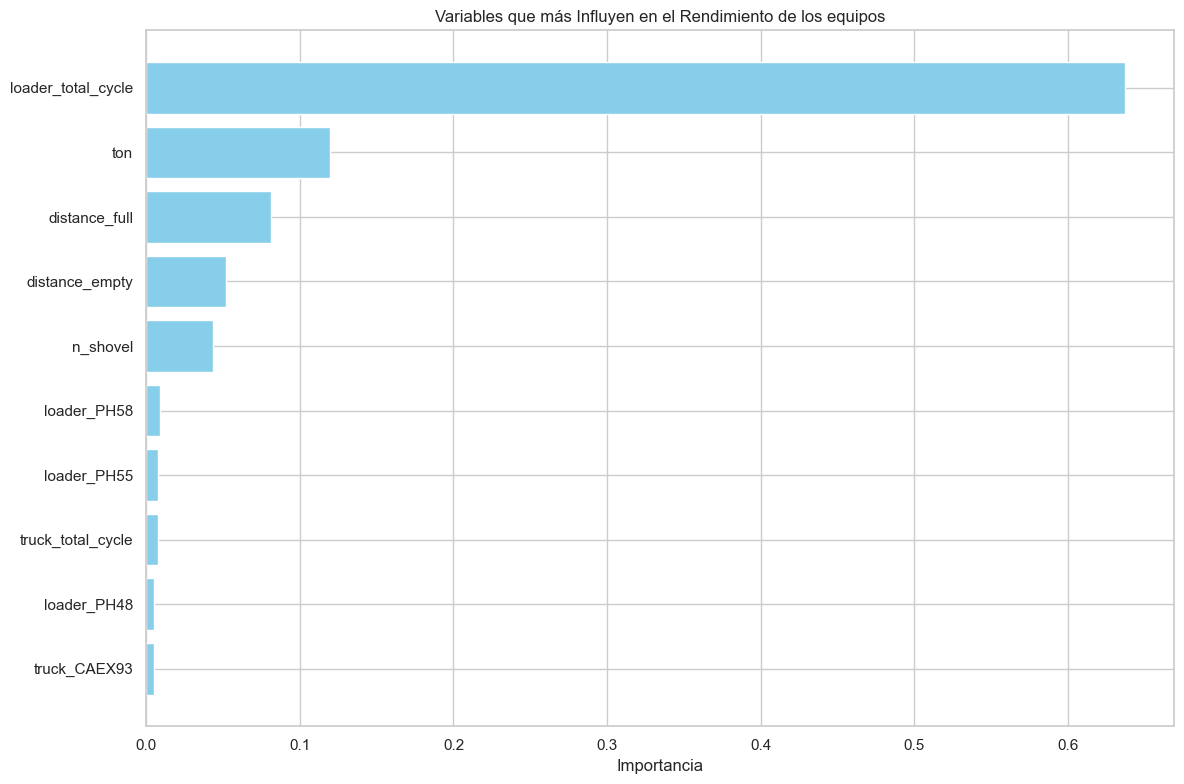

In [114]:
# Creamos el gráfico de las variables que más influyen en el rendimiendo de los equipos
top_n = 10
importance_df_top = importance_df.head(top_n)

plt.figure(figsize=(12, 8))

plt.barh(importance_df_top['Feature'], importance_df_top['Importance'], color='skyblue')

plt.xlabel('Importancia')
plt.title('Variables que más Influyen en el Rendimiento de los equipos')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Podemos observar el Top 10 de las varaibles más importantes que influyen en el rendimiento de equipos:
* La variable loader_total_cycle es la variable más importante, por lo que nos estaria indicando que el tiempo de ciclo de la pala tiene una influencia crítica en el rendimiento del equipo, por lo que el rendimiento estaria fuertemente afectado por el tiempo que toma cada ciclo total de la pala.
* Luego, la segunda variable más importante seria ton. Un tonelaje adecuado optimizaria el uso del equipo, mientras que si sobrecargas o subcargas un equipo la eficiencia del transporte se puede ver afectada.
* la distancia recorrida es la tercera variable más importante, cuanto  mayor es el tiempo del transporte, se reduce el rendimiento general.
* La variable distancia vacia, es la cuarta variable en importancia. Si bien, es menos importante que las demás variables, nos refleja que influye en el rendimiento de los equipos aunque de menor manera. El tiempo que toma un equipo para regresar a la zona de carga tiene un impacto en el ciclo total, al reducir la distancia mejorariamos la eficiencia.
* el n_shovel, esta variable es la quinta variable en rango de importancia. Esta podria indicarnos que un mayor numero de paladas para completar una carga puede indicar un proceso de carga más lento, lo cual podría afectar la eficiencia del equipo.
* Las variables restante, tienen una importancia mucho menor el modelo, lo que indica que su impacto en el rendimiento del equipo es limitado.

In [71]:
# Probaremos el comportamiento del modelo sin las variables truck y loader
X_1 = dfs[['ton', 'n_shovel', 'truck_total_cycle','loader_total_cycle', 'distance_empty', 'distance_full']]
y_1 = dfs['eficiencia_carga'] #Toneladas por segundo

In [72]:
# Relizamos el conjunto de entrenamiento y testeo
X_1train, X_1test, y_1train, y_1test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [ ]:
hiperparametros = {
    "criterion": ["squared_error"],  
    "n_estimators": [50],
    "max_depth": [None],              
    "max_features": ['sqrt'],
}

busqueda = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=hiperparametros,
    scoring="neg_mean_squared_error",  
    cv=3,                              
    n_jobs=-1,
    verbose=1
)

busqueda.fit(X_1train, y_1train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [None],
                         'max_features': ['sqrt'], 'n_estimators': [50]},
             scoring='neg_mean_squared_error', verbose=1)

In [74]:
mejor_rof = busqueda.best_estimator_
mejor_rof.fit(X_1train, y_1train)

RandomForestRegressor(max_features='sqrt', n_estimators=50, n_jobs=-1,
                      random_state=42)

In [75]:
y_pred1 = mejor_rof.predict(X_1test)
mse = mean_squared_error(y_1test, y_pred1)
r2 = r2_score(y_1test, y_pred1)

In [76]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error (MSE): 0.0010747069985989303
R2 Score: 0.9162358652196804


* Podemos observar que el MSE ha disminuido en comparación con el resultado anterior, lo que nos indica que el modelo es ahora más precisso. Sugiriendo que el modelo está haciendo un mejor trabajo al ajustarse sin las variables truck y loader.
* Al visualizar el R^2, observamos que este aumento, siendo una mejora significativa. Ahora el modelo es capaz de explicar el 91.6% de variabilidad en los datos.
* Por lo tanto, esta diferencia en los resultados sugiere que las variables truck y loader no aportaban información relevante pudiendo incluso introducir ruido al model.
Por lo que nos quedaremos con este modelo sin las variables truck y loader.

In [ ]:

feature_im = mejor_rof.feature_importances_

feature_name = ['n_shovel', 'truck_total_cycle', 'loader_total_cycle', 'distance_empty', 'distance_full', 'ton']

importance_dfs = pd.DataFrame({'Features': feature_name, 'Importances': feature_im})

importance_dfs = importance_dfs.sort_values(by='Importances', ascending=False)

print(importance_dfs)

             Features  Importances
2  loader_total_cycle     0.742314
5                 ton     0.114171
4       distance_full     0.079853
0            n_shovel     0.032517
3      distance_empty     0.025374
1   truck_total_cycle     0.005772


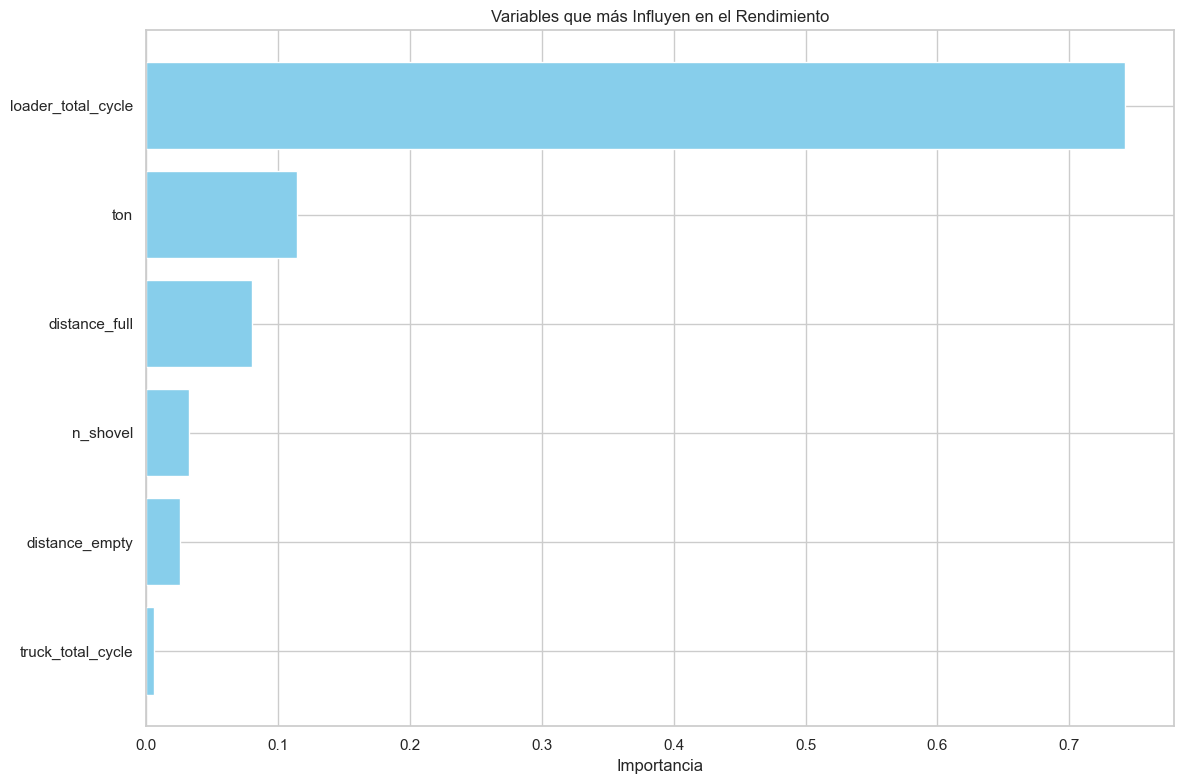

In [ ]:
# Realizamos el gráfico de las variables que más influyen en el rendimiento de los equipos
top_n = 6
importance_dfs_top = importance_dfs.head(top_n)

# Crear una figura de mayor tamaño
plt.figure(figsize=(12, 8))

# Graficar las barras con un color más claro para destacar las más importantes
plt.barh(importance_dfs_top['Features'], importance_dfs_top['Importances'], color='skyblue')

# Añadir títulos y etiquetas
plt.xlabel('Importancia')
plt.title('Variables que más Influyen en el Rendimiento')

# Invertir el eje Y para que la variable más importante aparezca arriba
plt.gca().invert_yaxis()

# Ajustar el diseño para que las etiquetas no se corten
plt.tight_layout()
plt.show()

En comparación con el grafico anterior se sigue manteniendo la misma predominancia en las variables loader_total_cyle, ton, distance_full. Sin embargo, la variable n_shovel paso a cuarto lugar y la distancia recorrida vacia paso a quinto, esto puede deberse a que al no contemplar las variables truck y loader se haya hecho una reducción de ruido al modelo.

In [89]:
# Probemos el comportamiento del modelo sin los valores 0 de loader_total_cycle
X_2 = data[['ton', 'n_shovel', 'truck_total_cycle','loader_total_cycle', 'distance_empty', 'distance_full']]
y_2 = data['eficiencia_carga'] #Toneladas por segundo

In [90]:
# Relizamos el conjunto de entrenamiento y testeo
X_2train, X_2test, y_2train, y_2test = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

In [ ]:
hiperparametros = {
    "criterion": ["squared_error"],  
    "n_estimators": [50],
    "max_depth": [None],               
    "max_features": ['sqrt'],
}


busqueda = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=hiperparametros,
    scoring="neg_mean_squared_error",  
    cv=3,                              
    n_jobs=-1,
    verbose=1
)

busqueda.fit(X_2train, y_2train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [None],
                         'max_features': ['sqrt'], 'n_estimators': [50]},
             scoring='neg_mean_squared_error', verbose=1)

In [92]:
mejor_model = busqueda.best_estimator_
mejor_model.fit(X_2train, y_2train)

RandomForestRegressor(max_features='sqrt', n_estimators=50, n_jobs=-1,
                      random_state=42)

In [93]:
y_pred2 = mejor_model.predict(X_2test)
mse = mean_squared_error(y_2test, y_pred2)
r2 = r2_score(y_2test, y_pred2)

In [94]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 0.0004083854576160619
R2 Score: 0.9677153169707765


In [95]:
# Obtener las importancias de características del mejor modelo de Random Forest
feature_imp = mejor_model.feature_importances_

# Lista de nombres de las características sin variables categóricas
featurename = ['n_shovel', 'truck_total_cycle', 'loader_total_cycle', 'distance_empty', 'distance_full', 'ton']

# Crear un DataFrame con las importancias de características
importance_ds = pd.DataFrame({'Features': featurename, 'Importances': feature_imp})

# Ordenar el DataFrame por la importancia en orden descendente
importance_ds = importance_ds.sort_values(by='Importances', ascending=False)

# Mostrar el DataFrame de importancia de características
print(importance_ds)

             Features  Importances
2  loader_total_cycle     0.733532
5                 ton     0.124939
4       distance_full     0.084153
0            n_shovel     0.030463
3      distance_empty     0.022735
1   truck_total_cycle     0.004177


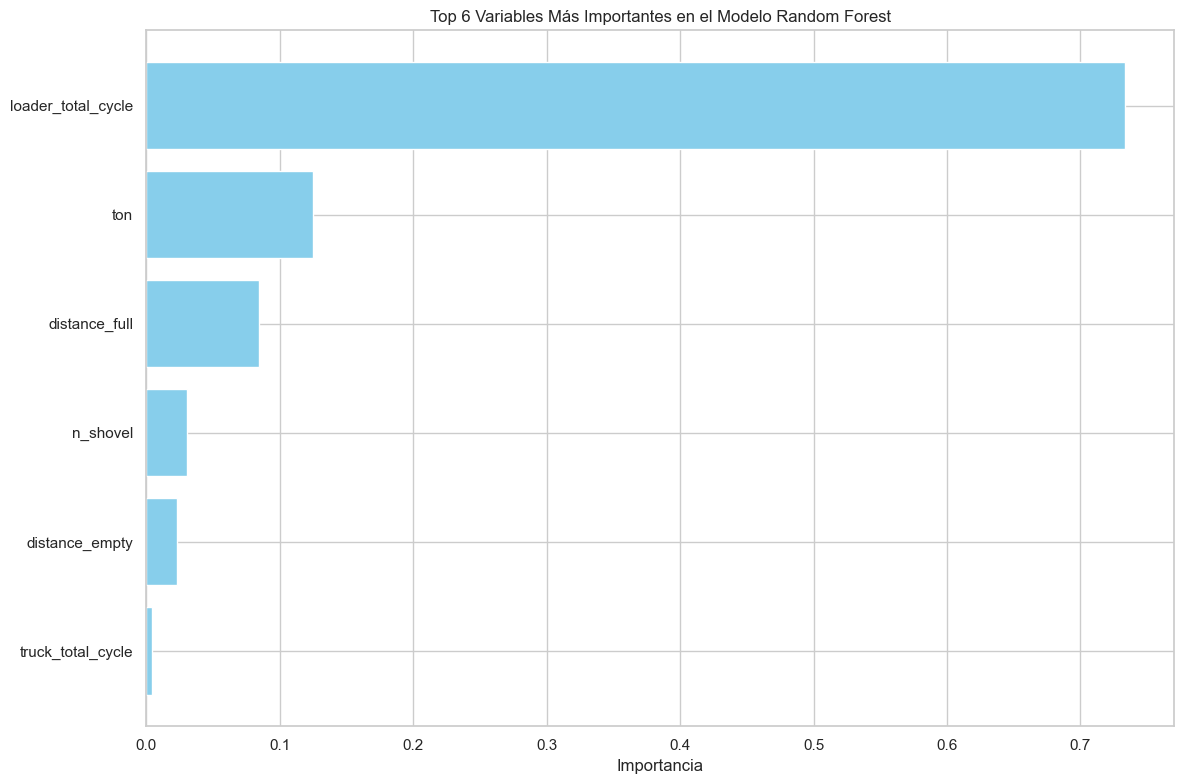

In [96]:
# Mostrar solo las 10 variables más importantes
top_n = 6
importance_ds_top = importance_ds.head(top_n)

# Crear una figura de mayor tamaño
plt.figure(figsize=(12, 8))

# Graficar las barras con un color más claro para destacar las más importantes
plt.barh(importance_ds_top['Features'], importance_ds_top['Importances'], color='skyblue')

# Añadir títulos y etiquetas
plt.xlabel('Importancia')
plt.title(f'Top {top_n} Variables Más Importantes en el Modelo Random Forest')

# Invertir el eje Y para que la variable más importante aparezca arriba
plt.gca().invert_yaxis()

# Ajustar el diseño para que las etiquetas no se corten
plt.tight_layout()
plt.show()

In [ ]:
# Hacemos una data sin los datos atipicos
dfs['is_outlier'] = (dfs['Anomalia_if'] == -1) & (data['anomalia_db'] == -1)

In [ ]:
data_cleaned = dfs[~dfs['is_outlier']].copy()

data_cleaned.drop(columns=['is_outlier', 'Anomalia_if', 'anomalia_db'], inplace=True)

In [ ]:
#Ahora probamos el comportamiendo del modelo sin los datos atípicos
X_4 = data[['ton', 'n_shovel', 'truck_total_cycle','loader_total_cycle', 'distance_empty', 'distance_full']]
y_4 = data['eficiencia_carga'] #Toneladas por segundo

In [102]:
# Relizamos el conjunto de entrenamiento y testeo
X_4train, X_4test, y_4train, y_4test = train_test_split(X_4, y_4, test_size=0.3, random_state=42)

In [ ]:
hiperparametros = {
    "criterion": ["squared_error"],  
    "n_estimators": [50],
    "max_depth": [None],              
    "max_features": ['sqrt'],
}


busqueda = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=hiperparametros,
    scoring="neg_mean_squared_error",  
    cv=3,                             
    n_jobs=-1,
    verbose=1
)

# Entrenar el modelo con GridSearchCV
busqueda.fit(X_4train, y_4train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [None],
                         'max_features': ['sqrt'], 'n_estimators': [50]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
model1 = busqueda.best_estimator_
model1.fit(X_4train, y_4train)

RandomForestRegressor(max_features='sqrt', n_estimators=50, n_jobs=-1,
                      random_state=42)

In [111]:
y_pred4 = model1.predict(X_4test)

In [112]:
y_pred4 = model1.predict(X_4test)
mse_2 = mean_squared_error(y_4test, y_pred4)
r2_1 = r2_score(y_4test, y_pred4)

In [113]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 0.0004083854576160619
R2 Score: 0.9677153169707765
